### 1. Get Data

In [ ]:
import requests
import zipfile
from pathlib import Path

# setup path to data folder
data_path = Path('data/')
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f'{image_path} directory exists')
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


### 2. Become one with the data 

In [ ]:
# setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualize an image

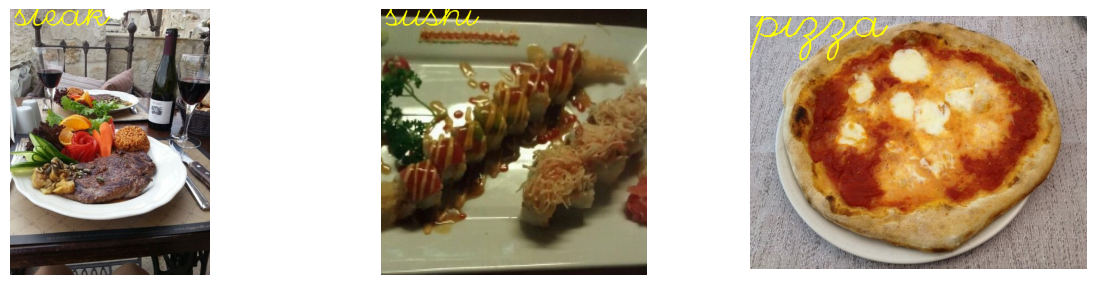

In [ ]:
import matplotlib.pyplot as plt
import os
import random
import cv2

plt.figure(figsize=(20, 20))

folders = os.listdir(train_dir)

i = 1
path = '/content/data/pizza_steak_sushi/train'
for folder in folders:
  images = os.listdir(f'{path}/{folder}')

  image = random.choice(images)

  img = cv2.imread(f'{path}/{folder}/{image}')

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  cv2.putText(img, folder, (10, 30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 3, (255, 255, 0), 2)

  plt.subplot(5, 4, i); plt.imshow(img);plt.axis('off')

  i = i+1

### 3. Transforming data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 3.1 Transforming data with torchvision.transforms

In [ ]:
data_transform = transforms.Compose([
    # resize image to 64x64
    transforms.Resize(size=(64, 64)),
    # flip image
    transforms.RandomHorizontalFlip(p=0.5),
    # turn imgae into tensor
    transforms.ToTensor()
])

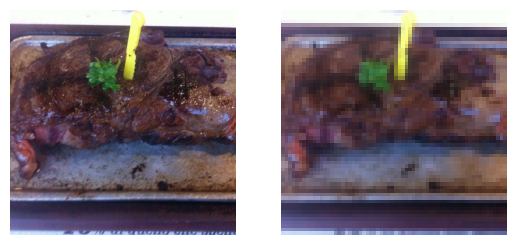

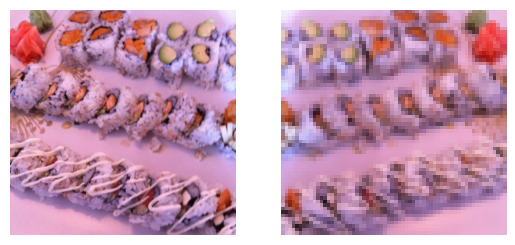

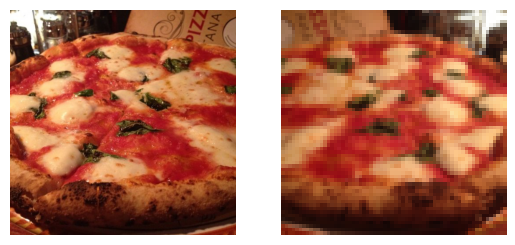

In [ ]:
# xem anh after transforms
path = '/content/data/pizza_steak_sushi/train'

folders = os.listdir(path)

from PIL import Image

i = 1

for folder in folders:

  fig, ax = plt.subplots(1, 2)

  images = os.listdir(f'{path}/{folder}')

  image = random.choice(images)

  img_org = Image.open(f'{path}/{folder}/{image}')

 
  
  ax[0].imshow(img_org)
  ax[0].axis('off')

  i=i+1

  img_trans = data_transform(img_org).permute(1, 2, 0) 
  ax[1].imshow(img_trans)
  ax[1].axis('off')

  i=i+1


### 4. Option 1: Loading Image Data using ImageFolder

In [ ]:
from torchvision import datasets

path_train = '/content/data/pizza_steak_sushi/train'
path_test = '/content/data/pizza_steak_sushi/test'

train_data = datasets.ImageFolder(root=path_train,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=path_test,
                                 transform=data_transform)

print(f'Train data:\n{train_data}\nTest data:\n{test_data}')


Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: /content/data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: /content/data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
print(train_data[0])

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0

### 4.1 Turn loaded images into DataLoader's

In [ ]:
# turn train and test Datasets into DataLoader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 1,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fae9f9152b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fae9f915c40>)

In [ ]:
# xem data
img, label = next(iter(train_dataloader))

print(f'Image shape: {img.shape}')
print(f'Label shape:{label.shape}')
print(label)
print(img)

Image shape: torch.Size([1, 3, 64, 64])
Label shape:torch.Size([1])
tensor([1])
tensor([[[[0.2941, 0.1412, 0.0980,  ..., 0.3098, 0.2706, 0.2431],
          [0.3647, 0.1725, 0.1098,  ..., 0.2824, 0.2275, 0.2000],
          [0.4314, 0.2118, 0.1176,  ..., 0.2431, 0.2118, 0.2392],
          ...,
          [0.2549, 0.2706, 0.2392,  ..., 0.0471, 0.0941, 0.1059],
          [0.2314, 0.2275, 0.2039,  ..., 0.0471, 0.0784, 0.0863],
          [0.1569, 0.1490, 0.1451,  ..., 0.0549, 0.0863, 0.0902]],

         [[0.2314, 0.0510, 0.0314,  ..., 0.1490, 0.1176, 0.1020],
          [0.3098, 0.0824, 0.0314,  ..., 0.1373, 0.0980, 0.0784],
          [0.3882, 0.1176, 0.0314,  ..., 0.1137, 0.0824, 0.1020],
          ...,
          [0.1216, 0.1373, 0.1137,  ..., 0.0235, 0.0392, 0.0392],
          [0.1137, 0.1137, 0.0980,  ..., 0.0196, 0.0314, 0.0353],
          [0.0706, 0.0588, 0.0549,  ..., 0.0275, 0.0353, 0.0392]],

         [[0.1608, 0.0588, 0.0588,  ..., 0.0824, 0.0667, 0.0706],
          [0.2157, 0.0745, 0

### 5. Option 2: Loading Image data with a custom Dataset

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

## 5.1 Creating a helper function to get class names

In [ ]:
# make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    # 1. get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Rasise an error if class names not found
    if not classes:
        raise FileNotFoundError(f'Not find any class')
    
    # 3. create a dictonary of idex labels
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
find_classes(path)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## 5.2 Create a custom dataset to repicate ImageFolder

In [ ]:
# write a custom dataset class
from torch.utils.data import Dataset

# 1. Phan lop torch.utils.data.Datast
class ImageFolderCustom(Dataset):

    # 2. khoi tao tham so targ_dir and transform parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class thuoc tinh
        # get all image paths
        # lay cac anh co duoi jpg
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # setup transforms
        self.transform=transform
        # create classes and class_to_idx thuoc tinh
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    # 4. make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and return its"
        image_path = self.path[index]
        return Image.open(image_path)

    # 5. overwrite the __len__() method 
    def __len__(self) -> int:
        "returns the total number of samples"
        return len(self.paths)
    
    # 6. overwrite the __getitem__() method
    def __getitem__(self, index: int) ->Tuple[torch.Tensor, int]:
        "returns one sample of data, data and label(X, y)"
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        # transform if neccessary
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [ ]:
# augment train data
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# don't augment test data
test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transform)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

### 7. Model

In [ ]:
# create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
# 1. Load data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=path_train, transform=simple_transform,
                                        target_transform=None)
test_data_simple = datasets.ImageFolder(root=path_test, transform=simple_transform)

import os
from torch.utils.data import DataLoader

# setup batch size
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create dataloader
train_dataloader_simple = DataLoader(train_data_simple, 
                              batch_size = BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_dataloader_simple = DataLoader(test_data_simple,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7fae912eea30>,
 <torch.utils.data.dataloader.DataLoader at 0x7fae9f7ee700>)

In [ ]:
# create CNN
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, 3, stride=1, padding =1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*16*16, output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(42)
model_0 = TinyVGG(3, 10, len(train_data.classes)).to(device)

In [ ]:
from prompt_toolkit.shortcuts.progress_bar.base import E
# show cnn use torchinfo
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[32, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [ ]:
# training loop
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # put model in train mode
    model.train()

    # setup train loss and train accuracy
    train_loss, train_acc = 0, 0

    # loop
    for batch, (X, y) in enumerate(dataloader):
        # send X, y to device
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer
        optimizer.zero_grad()

        # 4. backward
        loss.backward()

        # 5. optimzier step
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
    
    # adjust metric
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc



In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
    # put model in eval mode
    model.eval()
    
    # setup test loss acc
    test_loss, test_acc = 0, 0
    
    # loop
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            # send X, y to device
            X, y = X.to(device), y.to(device)

            # 1. forward
            test_pred = model(X)

            # 2. calculate loss 
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            # calculate 
            test_pred_labels = test_pred.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    # adjust metric
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
# ket hop train_step() voi test_step()
from tqdm.auto import tqdm

# 1. take 
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5
          ):

    # 2. create empty results r
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    # 3. loop
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model, dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model, dataloader=test_dataloader,
                                        loss_fn=loss_fn
                                    )
        
        # 4. print()
        print(
            f'Epoch: {epoch+1}',
            f'train_loss: {train_loss:.4f} | ',
            f'train_acc: {train_acc:.2f} | ',
            f'test_loss: {test_loss:.4f} | ',
            f'test_acc: {test_acc:.2f}'
        )

        # 5. update
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

In [ ]:
# train and eval
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(3, 10, len(train_data.classes)).to(device)

# setup
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr=0.01)
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 train_loss: 1.2313 |  train_acc: 0.25 |  test_loss: 1.2128 |  test_acc: 0.20
Epoch: 2 train_loss: 1.1023 |  train_acc: 0.41 |  test_loss: 1.1042 |  test_acc: 0.20
Epoch: 3 train_loss: 1.1016 |  train_acc: 0.29 |  test_loss: 1.1078 |  test_acc: 0.20
Epoch: 4 train_loss: 1.0943 |  train_acc: 0.41 |  test_loss: 1.1111 |  test_acc: 0.20
Epoch: 5 train_loss: 1.0998 |  train_acc: 0.29 |  test_loss: 1.1175 |  test_acc: 0.20


### 7.1 plot

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

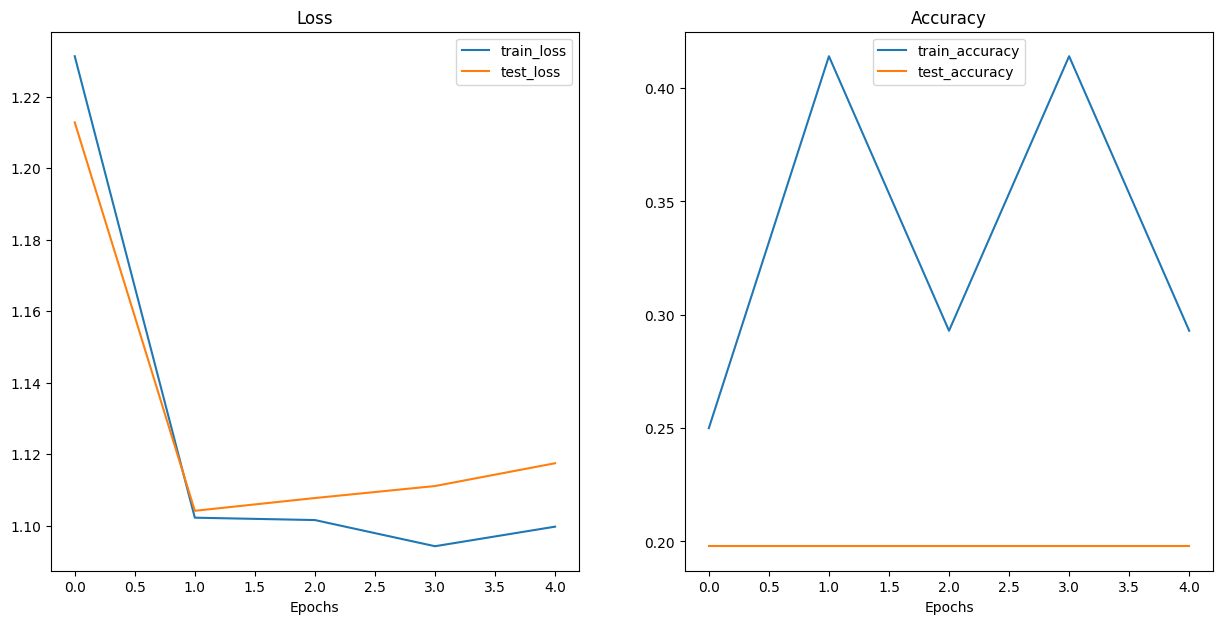

In [ ]:
plot_loss_curves(model_0_results)